In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans

In [2]:
#we will plot number of keywords found on x axis
#we will plot number of matches from the global values on y axis
openfile = open('/home/manan/Desktop/Research/Learning-Perspectives/results/scores.txt')
readfile = openfile.readlines()

## initialize with values from the teachers notes
X = np.array([[55,1]])

for i in readfile:
    a,b = i.split(' ')
    X = np.append(X,[[int(a),float(b)]],axis=0)
print(X)

[[5.50000000e+01 1.00000000e+00]
 [6.60000000e+01 1.19209290e-07]
 [1.00000000e+00 7.00649232e-48]
 [2.00000000e+00 5.90296373e+20]
 [3.00000000e+00 3.02821751e+23]
 [4.00000000e+00 3.02821751e+23]
 [5.00000000e+00 3.02821751e+23]
 [6.00000000e+00 1.59946006e+24]
 [7.00000000e+00 1.59946006e+24]
 [8.00000000e+00 1.59946006e+24]
 [9.00000000e+00 1.59946006e+24]
 [1.00000000e+01 1.59946006e+24]
 [1.10000000e+01 1.59946006e+24]
 [1.20000000e+01 1.59946006e+24]
 [1.30000000e+01 1.59946006e+24]
 [1.40000000e+01 1.59946006e+24]
 [1.50000000e+01 1.59946006e+24]
 [1.60000000e+01 1.59946006e+24]
 [1.70000000e+01 1.59946006e+24]
 [1.80000000e+01 1.59946006e+24]
 [1.90000000e+01 1.59946006e+24]
 [2.00000000e+01 1.59946006e+24]
 [2.10000000e+01 1.59946006e+24]
 [2.20000000e+01 2.41785164e+24]
 [2.30000000e+01 2.41785164e+24]
 [2.40000000e+01 2.41785164e+24]
 [2.50000000e+01 2.41785164e+24]
 [2.60000000e+01 2.41785164e+24]
 [2.70000000e+01 2.41785164e+24]
 [2.80000000e+01 2.41785164e+24]
 [2.900000

Text(0, 0.5, 'Matches Found')

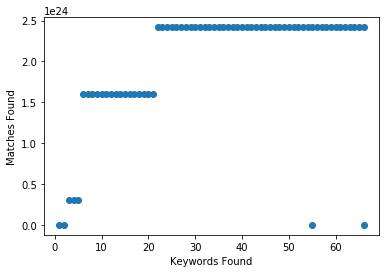

In [3]:
plt.scatter(X[:,0],X[:,1], label='Points')
plt.xlabel("Keywords Found")
plt.ylabel("Matches Found")


In [4]:
## apply K means
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
## cluster centres
print(kmeans.cluster_centers_)


[[4.40000000e+01 2.41785164e+24]
 [3.10000000e+01 1.47574093e+20]
 [1.35000000e+01 1.59946006e+24]
 [4.00000000e+00 3.02821751e+23]]


In [6]:
## labelled data (which data is in which cluster)
print(kmeans.labels_)

[1 1 1 1 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


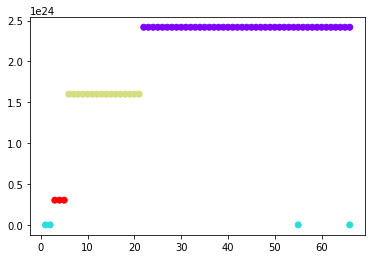

In [7]:
## plot the devided map using colors!
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_,cmap='rainbow')